In [1]:
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%y, %I:%M %p - ',
        '24hr' : '%d/%m/%y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) 
        # converting the list split by newline char. as one whole string as there can be multi-line messages
  
        user_msg = re.split(split_formats[key], raw_string) [1:] 
        # splits at all the date-time pattern, resulting in list of all the messages with user names
        
        date_time = re.findall(split_formats[key], raw_string) 
        # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) 
        # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) 
        # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user

        if(a[1:]): 
          # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: 
          # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("Group Notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = rawToDf('Core.txt' , '12hr')
df

,date_time,user,msg
0,2022-04-25 22:23:00,Group Notification,Messages and calls are end-to-end encrypted. N...
1,2022-04-16 02:17:00,Group Notification,"Aniket Agrawal TL Manager created group ""Core ..."
2,2022-04-25 22:20:00,Group Notification,Aniket Agrawal TL Manager added you
3,2022-04-25 22:22:00,Group Notification,Aniket Agrawal TL Manager added Prathmesh Shim...
4,2022-04-25 22:32:00,Aniket Agrawal TL Manager,
...,...,...,...
1672,2022-06-12 19:18:00,Payal choudhary Iitb Meta +1,Cool
1673,2022-06-12 22:37:00,Aryan Gupta Chemistry,https://groups.google.com/g/wncc_iitb/c/zP0B09...
1674,2022-06-12 23:16:00,Akshat Verma Aeromodelling,Kya baat hai
1675,2022-06-14 12:43:00,Ishit Garg WnCC,"Hi everyone, I have sent an email for our new ..."


In [4]:
df.shape

(1677, 3)

In [5]:
len(df.user.unique()) - 1

27

In [6]:
me = "Abhishek Mahajan"

In [7]:
images = df[df['msg']=="<Media omitted> "] 
#no. of images, images are represented by <media omitted>

images.shape

(92, 3)

In [8]:
grp_notif = df[df['user']=="Group Notification"] 
#no. of grp notifications

grp_notif.shape

(6, 3)

In [9]:
df.drop(images.index , inplace = True)
df.drop(grp_notif.index , inplace = True)

In [10]:
df.head(20)

,date_time,user,msg
4,2022-04-25 22:32:00,Aniket Agrawal TL Manager,
5,2022-04-25 22:32:00,Dhawal Singh MnP,I have an assignment/(endsem) deadline🥺
6,2022-04-25 22:33:00,Aniket Agrawal TL Manager,It will be a short introductory meet with some...
7,2022-04-25 22:33:00,Dhawal Singh MnP,Sure
8,2022-04-25 22:34:00,Shreedhar Malpani WnCC,Is day time possible?
9,2022-04-25 22:34:00,Shreedhar Malpani WnCC,ya evening?
10,2022-04-25 22:34:00,Dhawal Singh MnP,++
11,2022-04-25 22:34:00,Hiranmai Mohan Chemistry,I have an endsem from 530-830 tomm
12,2022-04-25 22:34:00,Hiranmai Mohan Chemistry,can't join before that
13,2022-04-25 22:34:00,Sourabh Hanje ERC,++


In [11]:
df.reset_index(inplace=True, drop=True)
df.shape

(1579, 3)

Who is the Most Active Person in the Group ?


In [12]:
df.groupby("user")['msg'].count().sort_values(ascending = False)

user
Piyush Porwal Manager, Aeromodelling club    180
Sharad Vishwakarma TL                        175
Aniket Agrawal TL Manager                    150
MOHIT SHARMA Web                             132
Aryan Gupta Chemistry                        124
Shreedhar Malpani WnCC                        99
Vaishnavi Agnihotri BioX                      72
Akshat Verma Aeromodelling                    66
Anokhi Amit Mehta Energy                      64
+91 99591 22693                               62
Payal choudhary Iitb Meta +1                  53
Ishit Garg WnCC                               43
Anubhab Ray Iitb Cs Energy gc                 41
Aditya TL                                     41
+91 98343 64709                               39
Advait Mehla Krittika                         37
Pulkit Jindal                                 31
Prathmesh Shimpi Iitb +0                      30
Tharun Mahesh MnP                             30
Dhawal Singh MnP                              29
Hiranmai Mohan 

In [13]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 6.6 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=1b82919f73248cb66949f827ef6767f25de77b57b80bce582c228b9b27f4d5bc
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [14]:
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

In [15]:
import plotly.express as px

What can my activity say about sleep cycle?


In [16]:
df['hour'] = df['date_time'].apply(lambda x : x.hour)
fig = px.histogram(data_frame = df , x = 'hour')
fig.update_layout(bargap=0.2)

What is the Difference in Weekend vs Weekday usage pattern?


In [17]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) 
# can use day_name or weekday from datetime 

In [18]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [19]:
msgs_per_user = df['user'].value_counts(sort=True)
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Piyush Porwal Manager, Aeromodelling club',
 'Sharad Vishwakarma TL',
 'Aniket Agrawal TL Manager',
 'MOHIT SHARMA Web',
 'Aryan Gupta Chemistry']

In [20]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,hour,weekday,is_weekend
0,2022-04-25 22:32:00,Aniket Agrawal TL Manager,,22,Monday,False
2,2022-04-25 22:33:00,Aniket Agrawal TL Manager,It will be a short introductory meet with some...,22,Monday,False
10,2022-04-25 22:35:00,Sharad Vishwakarma TL,++,22,Monday,False
12,2022-04-25 22:38:00,Aryan Gupta Chemistry,+,22,Monday,False
13,2022-04-25 22:45:00,Aniket Agrawal TL Manager,"So, either we can have it at 10:30 P.M. or 11:...",22,Monday,False


In [21]:
px.bar(data_frame = df_top5 , x = "user" , color = "weekday" , barmode='group')

In [22]:
px.bar(data_frame = df_top5 , x = "user" , color = "is_weekend" , barmode='group')

In [23]:
def word_count(val):
    return len(val.split())

In [24]:
df['no_of_words'] = df['msg'].apply(word_count)

In [25]:
df

,date_time,user,msg,hour,weekday,is_weekend,no_of_words
0,2022-04-25 22:32:00,Aniket Agrawal TL Manager,,22,Monday,False,0
1,2022-04-25 22:32:00,Dhawal Singh MnP,I have an assignment/(endsem) deadline🥺,22,Monday,False,5
2,2022-04-25 22:33:00,Aniket Agrawal TL Manager,It will be a short introductory meet with some...,22,Monday,False,17
3,2022-04-25 22:33:00,Dhawal Singh MnP,Sure,22,Monday,False,1
4,2022-04-25 22:34:00,Shreedhar Malpani WnCC,Is day time possible?,22,Monday,False,4
...,...,...,...,...,...,...,...
1574,2022-06-12 19:18:00,Payal choudhary Iitb Meta +1,Cool,19,Sunday,True,1
1575,2022-06-12 22:37:00,Aryan Gupta Chemistry,https://groups.google.com/g/wncc_iitb/c/zP0B09...,22,Sunday,True,13
1576,2022-06-12 23:16:00,Akshat Verma Aeromodelling,Kya baat hai,23,Sunday,True,3
1577,2022-06-14 12:43:00,Ishit Garg WnCC,"Hi everyone, I have sent an email for our new ...",12,Tuesday,False,30


In [26]:
df.groupby('user').no_of_words.sum().sort_values(ascending = False)

user
Piyush Porwal Manager, Aeromodelling club    1470
Sharad Vishwakarma TL                        1164
Aniket Agrawal TL Manager                    1157
Shreedhar Malpani WnCC                       1118
MOHIT SHARMA Web                              857
Aryan Gupta Chemistry                         712
Akshat Verma Aeromodelling                    564
Anokhi Amit Mehta Energy                      543
Anubhab Ray Iitb Cs Energy gc                 431
Advait Mehla Krittika                         424
+91 99591 22693                               400
Vaishnavi Agnihotri BioX                      389
+91 98343 64709                               379
Payal choudhary Iitb Meta +1                  312
Sourabh Hanje ERC                             260
Ishit Garg WnCC                               258
Tharun Mahesh MnP                             245
Pulkit Jindal                                 198
Aditya TL                                     193
Dhawal Singh MnP                             

In [27]:
avg_msg_size = df.groupby('user').no_of_words.sum().sort_values(ascending = False)/df.groupby("user")['msg'].count().sort_values(ascending = False)

In [28]:
avg_msg_size.sort_values(ascending = False)

user
Sourabh Hanje ERC                            18.571429
Advait Mehla Krittika                        11.459459
Shreedhar Malpani WnCC                       11.292929
Anubhab Ray Iitb Cs Energy gc                10.512195
+91 98343 64709                               9.717949
Akshat Verma Aeromodelling                    8.545455
Anokhi Amit Mehta Energy                      8.484375
Piyush Porwal Manager, Aeromodelling club     8.166667
Tharun Mahesh MnP                             8.166667
Aniket Agrawal TL Manager                     7.713333
Sharad Vishwakarma TL                         6.651429
MOHIT SHARMA Web                              6.492424
+91 99591 22693                               6.451613
Pulkit Jindal                                 6.387097
Aniruddh Baranwal TL                          6.375000
Ishit Garg WnCC                               6.000000
Payal choudhary Iitb Meta +1                  5.886792
Dhawal Singh MnP                              5.827586
Aryan

In [29]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,5.0,NaN,33.0,NaN,NaN,13.0,11.0
1,20.0,2.0,4.0,NaN,NaN,NaN,21.0
2,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,1.0,2.0,NaN,NaN,NaN,NaN,NaN


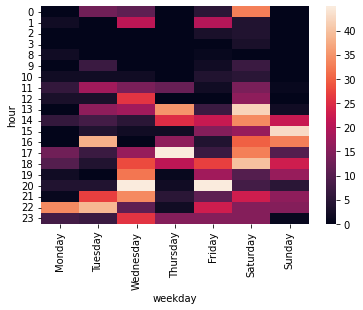

In [30]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

Anyone Specific Whom I have replied ?

In [31]:
my_msgs_index = np.array(df[df['user']==me].index)

In [32]:
prev_msgs_index = my_msgs_index - 1

In [33]:
df_replies = df.iloc[prev_msgs_index].copy()

In [35]:
z = df['date_time'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['date_time'].map(z1)
### Timeseries plot 
fig = px.line(x=df['date_time'],y=df['Msg_count'])
fig.update_xaxes(nticks=20)
fig.show()

In [36]:
df

,date_time,user,msg,hour,weekday,is_weekend,no_of_words,Msg_count
0,2022-04-25 22:32:00,Aniket Agrawal TL Manager,,22,Monday,False,0,2
1,2022-04-25 22:32:00,Dhawal Singh MnP,I have an assignment/(endsem) deadline🥺,22,Monday,False,5,2
2,2022-04-25 22:33:00,Aniket Agrawal TL Manager,It will be a short introductory meet with some...,22,Monday,False,17,2
3,2022-04-25 22:33:00,Dhawal Singh MnP,Sure,22,Monday,False,1,2
4,2022-04-25 22:34:00,Shreedhar Malpani WnCC,Is day time possible?,22,Monday,False,4,6
...,...,...,...,...,...,...,...,...
1574,2022-06-12 19:18:00,Payal choudhary Iitb Meta +1,Cool,19,Sunday,True,1,1
1575,2022-06-12 22:37:00,Aryan Gupta Chemistry,https://groups.google.com/g/wncc_iitb/c/zP0B09...,22,Sunday,True,13,1
1576,2022-06-12 23:16:00,Akshat Verma Aeromodelling,Kya baat hai,23,Sunday,True,3,1
1577,2022-06-14 12:43:00,Ishit Garg WnCC,"Hi everyone, I have sent an email for our new ...",12,Tuesday,False,30,1


In [37]:
df['month'] = df['date_time'].apply(lambda x : x.month)
fig = px.histogram(data_frame = df , x = 'month')
fig.update_layout(bargap=0.2)